In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [31]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [32]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [34]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [61]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:xlabel='radio', ylabel='sales'>

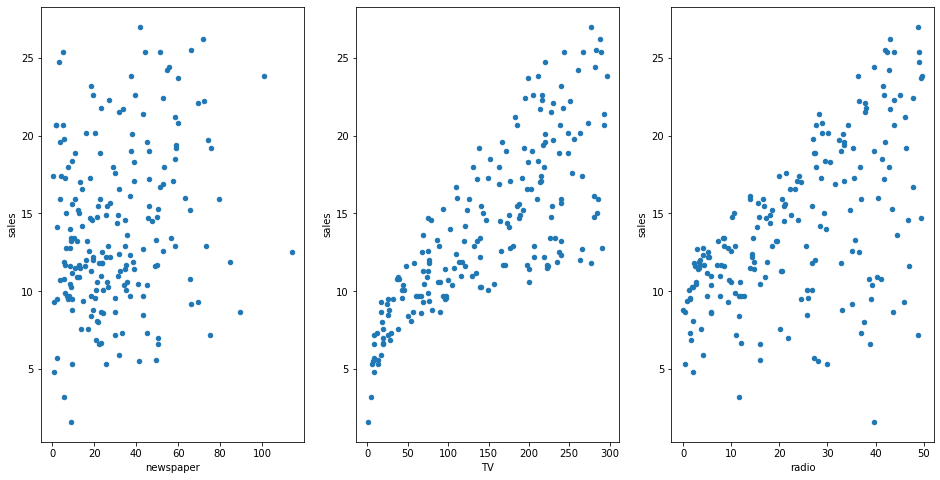

In [75]:
fig,axis = plt.subplots(1,3)
df.plot(kind = 'scatter',x='TV',y='sales',ax=axis[1],figsize=(16,8))
df.plot(kind = 'scatter',x='newspaper',y='sales',ax=axis[0],figsize=(16,8))
df.plot(kind = 'scatter',x='radio',y='sales',ax=axis[2],figsize=(16,8))

In [143]:
import matplotlib.pyplot as plt
import pickle
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [144]:
x= df[['TV']]
y =df.sales
from sklearn.linear_model import LinearRegression

In [145]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [146]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


In [147]:
7.0325 + 0.0475*50

9.407499999999999

In [148]:
x_new = pd.DataFrame({'TV':[50]})
x_new.head()

,TV
0,50


In [149]:
lm.predict(x_new)

array([9.40942557])

In [150]:
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new.head

<bound method NDFrame.head of       TV
0    0.7
1  296.4>

In [151]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

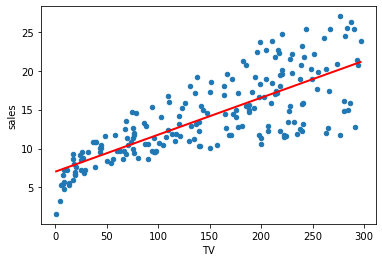

In [152]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,preds,c='red',linewidth=2)

In [105]:
x= df[['radio']]
y =df.sales

In [106]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [107]:
print(lm.intercept_)
print(lm.coef_)

9.311638095158283
[0.20249578]


In [108]:
7.0325 + 0.0475*50

9.407499999999999

In [109]:
x_new = pd.DataFrame({'radio':[50]})
x_new.head()

,radio
0,50


In [120]:
lm.predict(x_new)

array([ 9.3116381 , 19.35542895])

In [121]:
x_new = pd.DataFrame({'radio':[df.radio.min(),df.radio.max()]})
x_new.head

<bound method NDFrame.head of    radio
0    0.0
1   49.6>

In [122]:
preds = lm.predict(x_new)
preds

array([ 9.3116381 , 19.35542895])

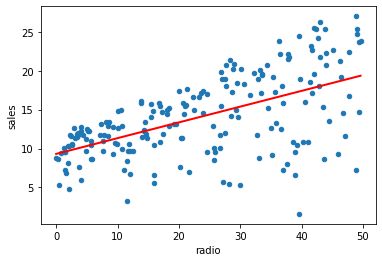

In [123]:
df.plot(kind='scatter',x='radio',y='sales')
plt.plot(x_new,preds,c='red',linewidth=2)

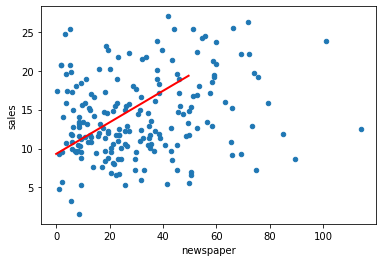

In [124]:
df.plot(kind='scatter',x='newspaper',y='sales')
plt.plot(x_new,preds,c='red',linewidth=2)

In [128]:
x = df[['TV','radio','newspaper']]
y = df.sales
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [130]:
print('intercept:->',lm.intercept_)
print('TV:->',lm.coef_[1])
print('radio:->',lm.coef_[2])
print('newspaper:->',lm.coef_[0])

intercept:-> 2.9388893694594067
TV:-> 0.18853001691820453
radio:-> -0.00103749304247629
newspaper:-> 0.04576464545539761


In [141]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'sales ~ TV',df = df).fit()
lm.pvalue()

TypeError: from_formula() missing 1 required positional argument: 'data'